# mplfinance

matplotlib 是常用可视化模块，其中有个包 mpl_finance，可以用来做日本蜡烛图，但是现在停止开发了，mplfinance 是它的继承者。

今天我们学习如何使用mplfinance 利用历史数据画K线或蜡烛图。

In [1]:
import sys
!{sys.executable} -m pip install mplfinance

import mplfinance as mpf
print(mpf.__version__)

0.12.5a3


首先安装 mplfinance, 导入模块简称 mpf

前面的感叹号是执行bash 命令，这里sys.executable 相当于python 命令

因为这里直接用pip 安装不行

In [2]:
import pandas_datareader as web
from datetime import datetime

symbol = 'SPY'
start = datetime(2020, 1, 1)
end = datetime(2020, 6, 19)

df = web.DataReader(symbol, data_source='yahoo', start=start, end=end)
df.info()

/usr/local/lib/python3.6/dist-packages/pandas_datareader/compat/__init__.py:7: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  from pandas.util.testing import assert_frame_equal


<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 118 entries, 2020-01-02 to 2020-06-19
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   High       118 non-null    float64
 1   Low        118 non-null    float64
 2   Open       118 non-null    float64
 3   Close      118 non-null    float64
 4   Volume     118 non-null    float64
 5   Adj Close  118 non-null    float64
dtypes: float64(6)
memory usage: 6.5 KB


首先用  pandas_datareader 模块来下载股票数据

比如我们看标普SPY ETF，确定起始日和终止日

然后从雅虎 Yahoo 网站直接下载数据，放在一个pandas 的dataframe 里面

打印基本信息，这组数据有6列，日内高点／低点，开盘／收盘价，成交量及调整后收盘价

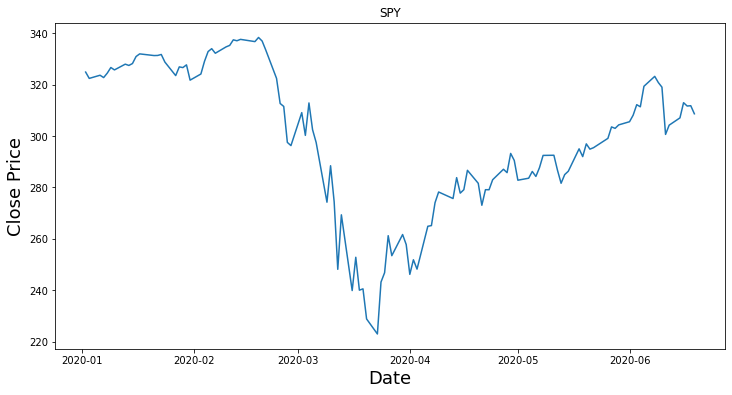

In [3]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.title(symbol)
plt.plot(df['Close'])
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price', fontsize=18)
plt.show()

我们可以用 matplotlib 来画图

比如我们把SPY 今年的收盘价画出来

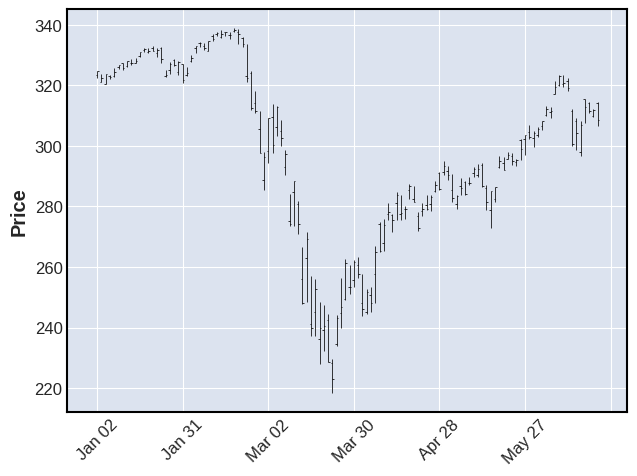

In [4]:
mpf.plot(df)

直接调用 mpf 的plot 方法画图，效果如上所示

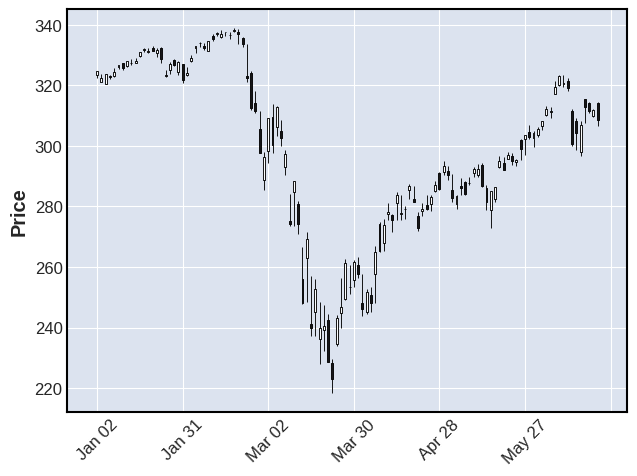

In [5]:
mpf.plot(df,type='candle')

如果要蜡烛图的话，直接把默认的type 改成 'candle' 就行

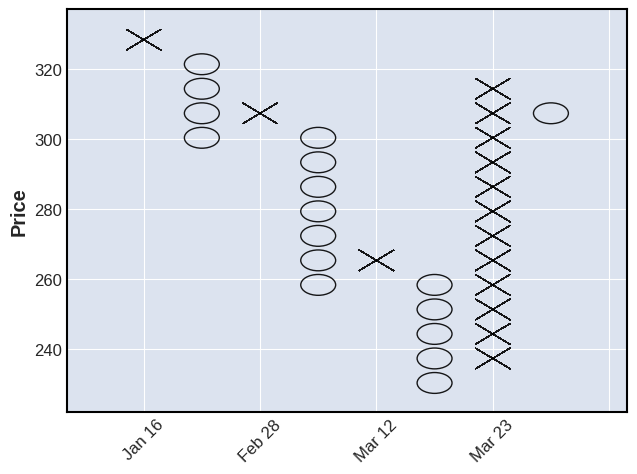

In [6]:
mpf.plot(df,type='pnf')

还有神秘的圈叉图，type='pnf' 表示 Point and Figure

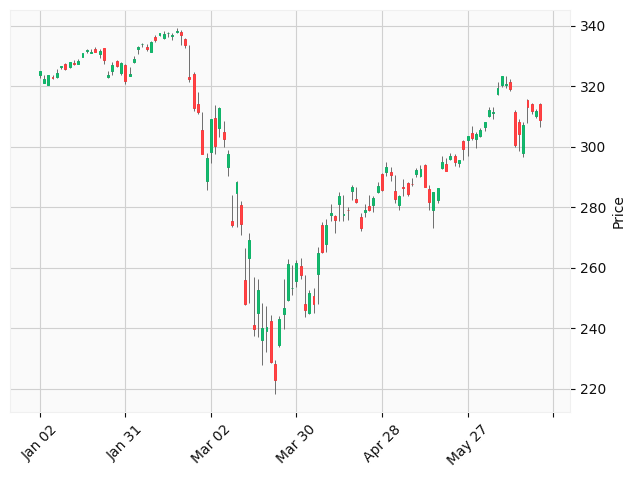

In [7]:
mpf.plot(df, type='candle', style='yahoo')

加上风格参数就漂亮多了，上图是雅虎风，style='yahoo'

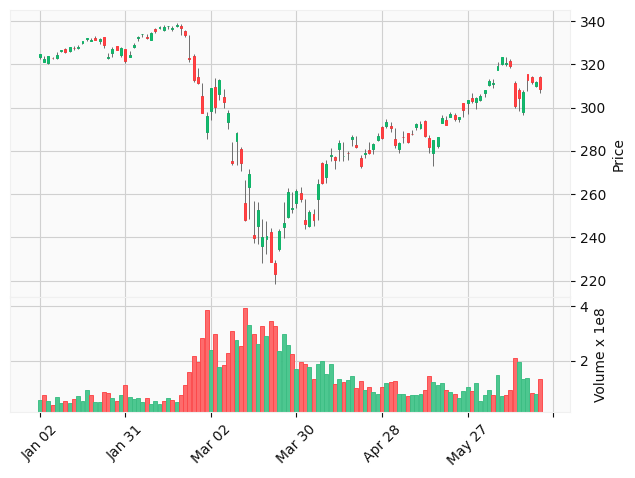

In [8]:
mpf.plot(df, type='candle', style='yahoo', volume=True) 

当然把成交量加上去就更牛了， volume=True

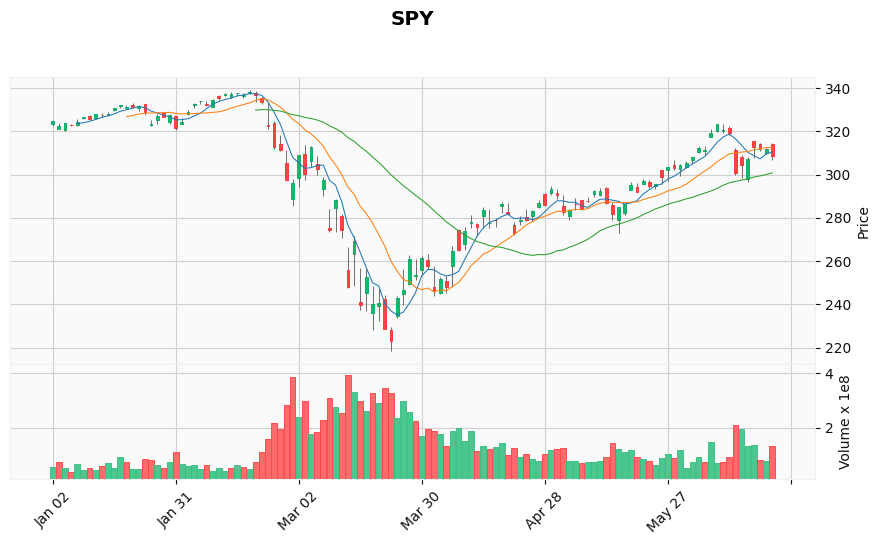

In [9]:
mpf.plot(df, type='candle', style='yahoo', volume=True, mav=(5, 13, 34),
              figratio=(16, 8), title='SPY', ylabel='Price')

最后我们加上均线就基本上可以使用了，mav=(5, 13, 34)

这里我们用Fibonacci 数组做了个均线系统

最后如果要保存的话，加上 savefig='spy_2020.png' 就可以了

如果要自定义风格的话，可以参考mplfinance 文档